In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
data = pd.read_csv('zomato_clean.csv',index_col=0)
data.head()

,reasturant,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [4]:
data.online_order.value_counts()

online_order
Yes    17493
No      8237
Name: count, dtype: int64

1.How many restarunts accepting online order for zomatos

<Axes: xlabel='online_order'>

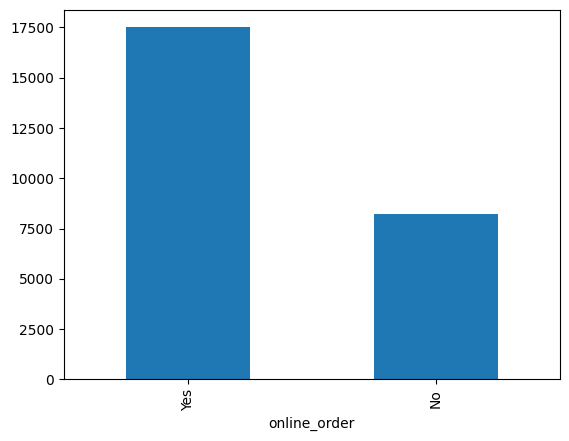

In [5]:
data.online_order.value_counts().plot(kind="bar")

<Axes: xlabel='online_order', ylabel='count'>

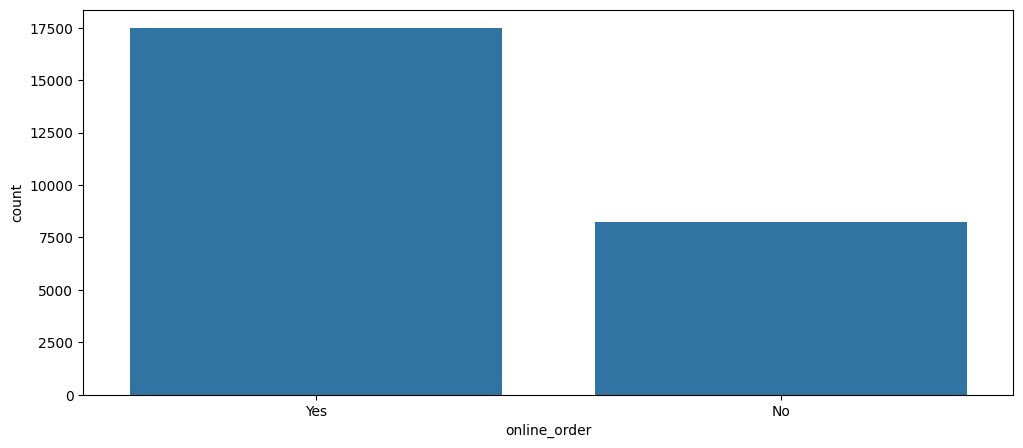

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x='online_order',data=data)

In [16]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

By the CountPlot wer can say that by zomato 17500 deliver by online and remaing restaurants 7800 not deliver online

2.Find Best Locatio by Dataset

<Axes: xlabel='location', ylabel='votes'>

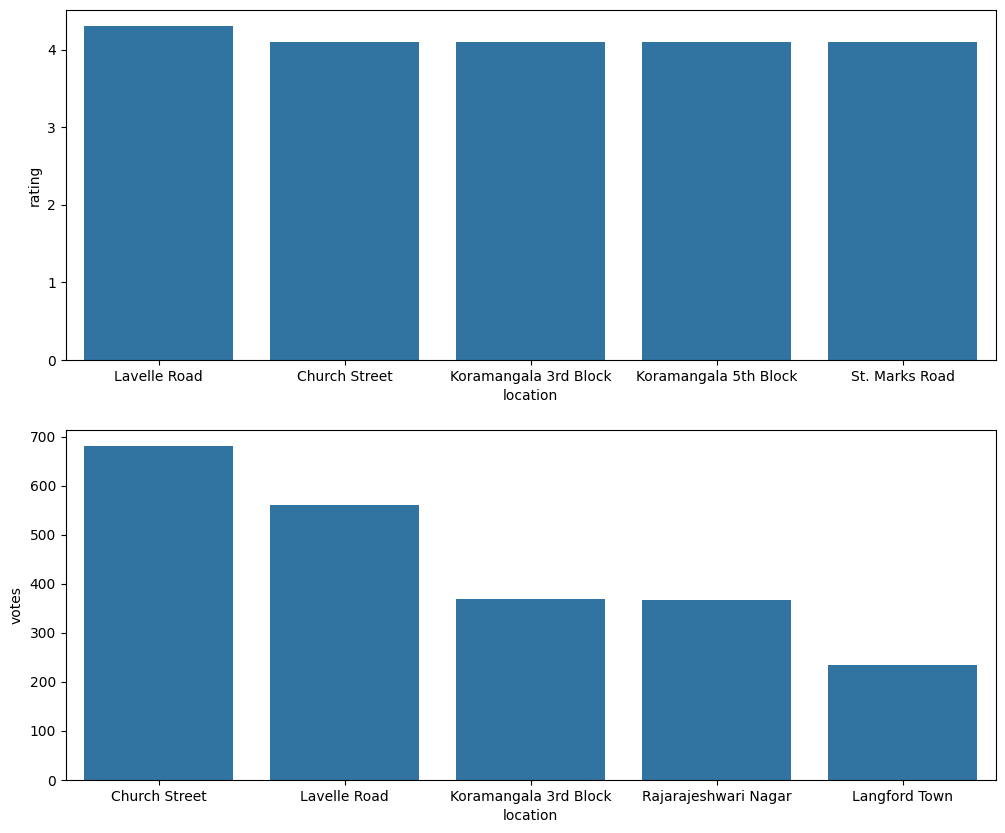

In [18]:
plt.figure(figsize=(12,10))
ax=plt.subplot(2,1,1)

location_rating = data.groupby('location').agg({'rating': 'median'})
rating_sorted = location_rating.sort_values('rating', ascending=False).head(5).reset_index()
sns.barplot(x='location', y='rating', data=rating_sorted)

ax=plt.subplot(2,1,2)

location_rating = data.groupby('location').agg({'votes': 'median'})
rating_sorted = location_rating.sort_values('votes', ascending=False).head(5).reset_index()
sns.barplot(x='location', y='votes', data=rating_sorted)

3.Find types of resturant and thyere counts

In [24]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

<Axes: xlabel='reasturant', ylabel='rest_type'>

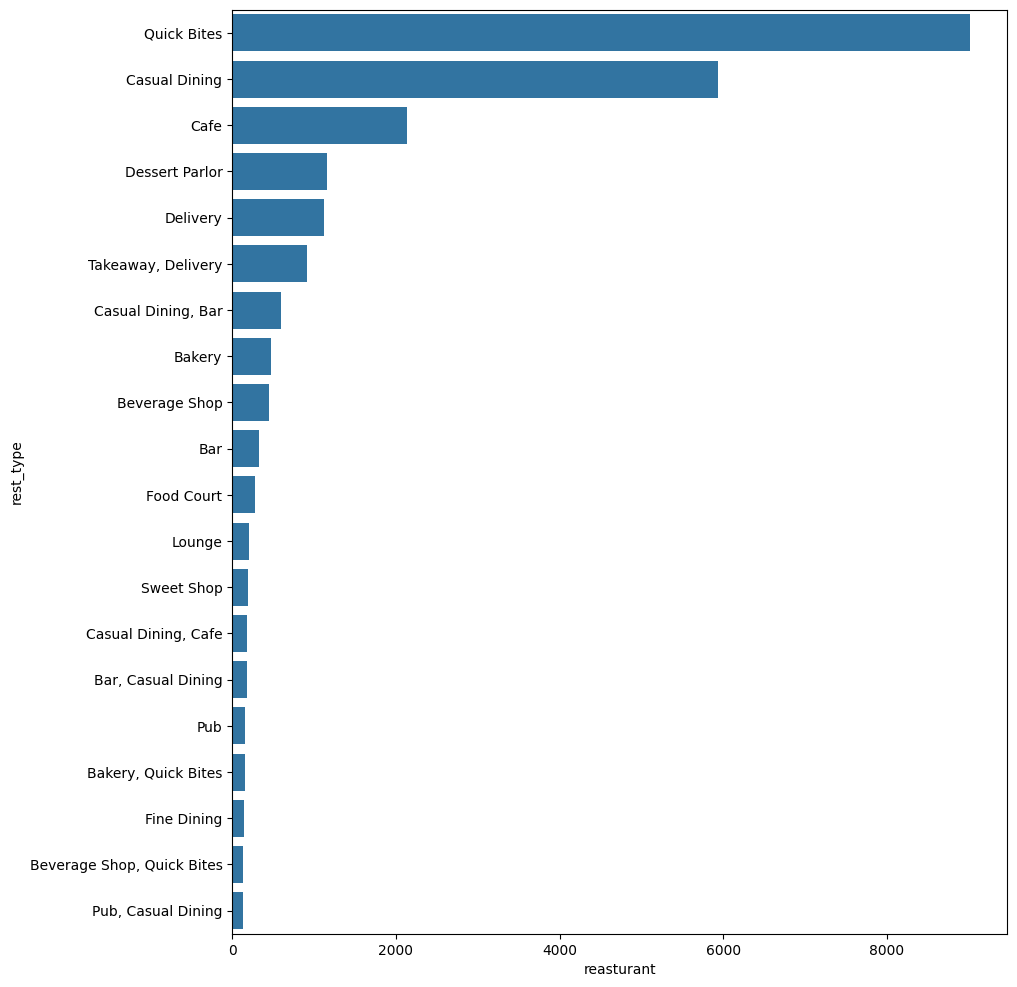

In [45]:
plt.figure(figsize=(10,12))
rest_groups=data.groupby('rest_type')['reasturant'].count().reset_index()
sort_list=rest_groups.sort_values('reasturant',ascending=False).head(20)


sns.barplot(y='rest_type',x='reasturant',data=sort_list,orient='h')

Find Costs of restaurant

<Axes: xlabel='cost', ylabel='Density'>

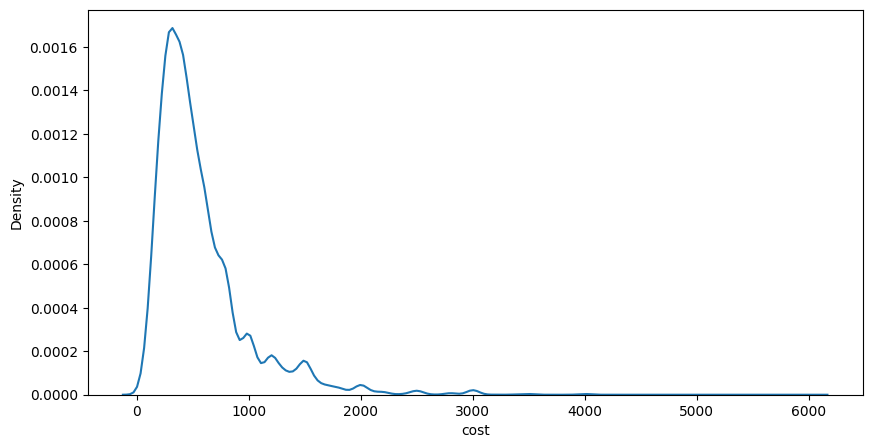

In [46]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='cost',data=data)

Find the restaurant which have booking as facility

<Axes: xlabel='book_table', ylabel='reasturant'>

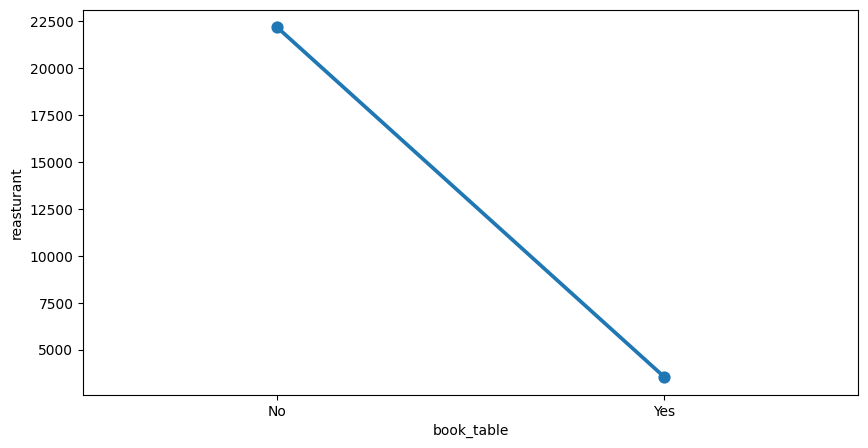

In [52]:
plt.figure(figsize=(10,5))

table_booking=data.groupby('book_table')['reasturant'].count().reset_index()

sns.pointplot(x='book_table',y='reasturant',data=table_booking)

Find the numbers o frestuarnt in thee above location

In [53]:
data.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

<Axes: xlabel='location', ylabel='reasturant'>

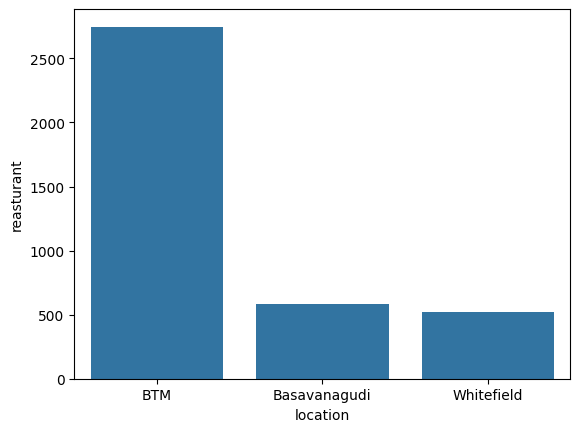

In [57]:
df=pd.DataFrame(data.groupby('location')['reasturant'].count()).reset_index()

cretaria=df['location'].isin(['BTM','Basavanagudi','West Bangalore','Whitefield','Yeshwantpur'])

sns.barplot(x='location',y='reasturant',data=df[cretaria])